In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
transaction_df = pd.read_csv('transaction_data.csv')
transaction_df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [3]:
purchase_df = pd.read_csv('purchase_behaviour.csv')
purchase_df.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


Checking for missing values

In [4]:
transaction_df.isnull().sum()

,0
DATE,0
STORE_NBR,0
LYLTY_CARD_NBR,0
TXN_ID,0
PROD_NBR,0
PROD_NAME,0
PROD_QTY,0
TOT_SALES,0


In [5]:
purchase_df.isnull().sum()

,0
LYLTY_CARD_NBR,0
LIFESTAGE,0
PREMIUM_CUSTOMER,0


In [6]:
merged_df = transaction_df.merge(purchase_df, on="LYLTY_CARD_NBR", how="left")
merged_df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,MIDAGE SINGLES/COUPLES,Budget
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,MIDAGE SINGLES/COUPLES,Budget


Identification of top 3 most profitable products

In [7]:
top_products = (
    merged_df.groupby("PROD_NAME")["TOT_SALES"]
    .sum()  # Sum total sales for each product
    .sort_values(ascending=False)  # Sort in descending order
    .head(3)  # Get the top 3 products
)
print("Top 3 Most Profitable Products:\n", top_products)


Top 3 Most Profitable Products:
 PROD_NAME
Dorito Corn Chp     Supreme 380g            40352.0
Smiths Crnkle Chip  Orgnl Big Bag 380g      36367.6
Smiths Crinkle Chips Salt & Vinegar 330g    34804.2
Name: TOT_SALES, dtype: float64


Visualization of top 3 profitable products

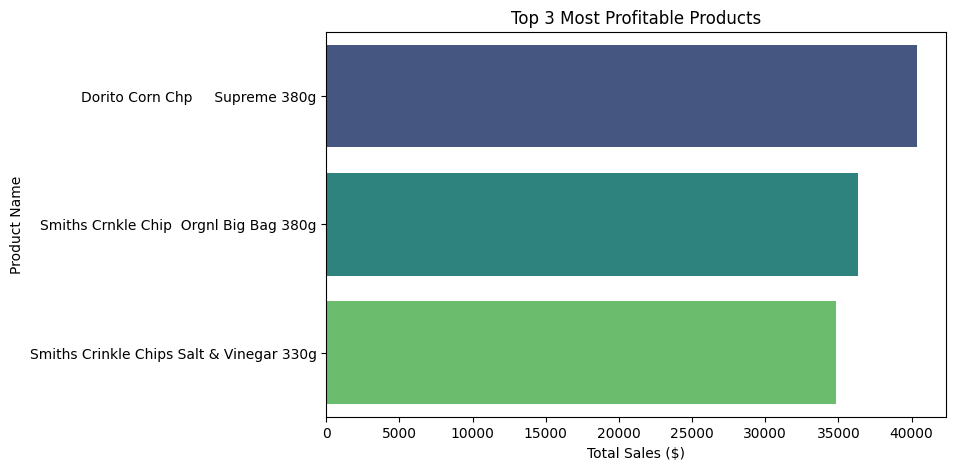

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 5))
sns.barplot(x=top_products.values, y=top_products.index, palette="viridis")
plt.xlabel("Total Sales ($)")
plt.ylabel("Product Name")
plt.title("Top 3 Most Profitable Products")
plt.show()


Identification of most loyal customers

In [9]:
loyal_customers = (
    transaction_df["LYLTY_CARD_NBR"].value_counts().head(10)
)

In [13]:
loyal_customer_segments = (
    merged_df.groupby(["LIFESTAGE", "PREMIUM_CUSTOMER"])["TXN_ID"]
    .count()
    .reset_index()
    .sort_values(by="TXN_ID", ascending=False)
    .head(10)
)
print("Top 10 loyal customers:\n", loyal_customer_segments)

                LIFESTAGE PREMIUM_CUSTOMER  TXN_ID
6          OLDER FAMILIES           Budget   23160
13               RETIREES       Mainstream   21466
19  YOUNG SINGLES/COUPLES       Mainstream   20854
15         YOUNG FAMILIES           Budget   19122
9   OLDER SINGLES/COUPLES           Budget   18407
10  OLDER SINGLES/COUPLES       Mainstream   18318
11  OLDER SINGLES/COUPLES          Premium   17754
12               RETIREES           Budget   15201
7          OLDER FAMILIES       Mainstream   14244
14               RETIREES          Premium   13096


Visualization of top 10 most profitable customer segments

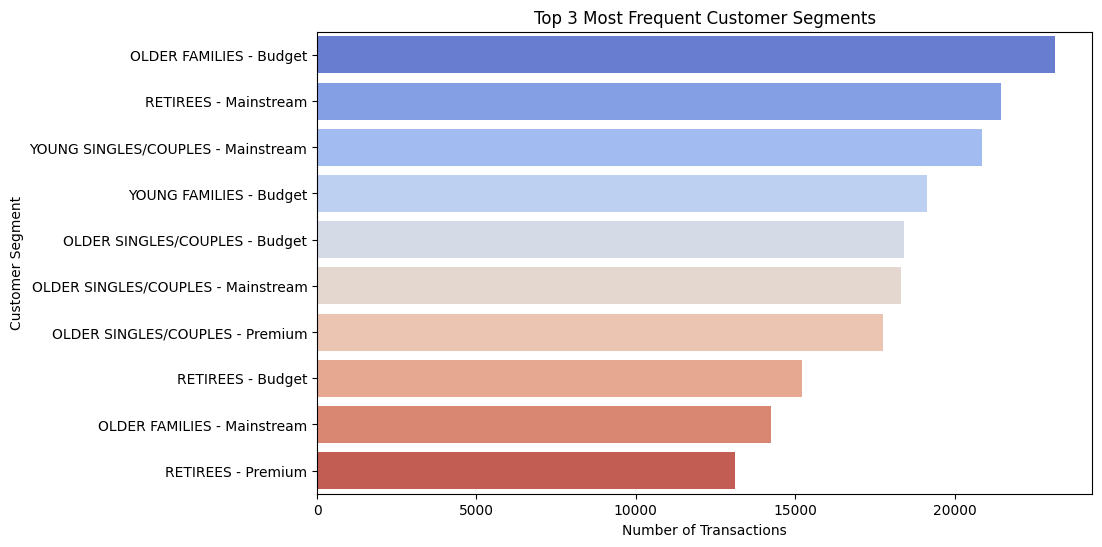

In [14]:
plt.figure(figsize=(10, 6))
sns.barplot(
    x=loyal_customer_segments["TXN_ID"],
    y=loyal_customer_segments["LIFESTAGE"] + " - " + loyal_customer_segments["PREMIUM_CUSTOMER"],
    palette="coolwarm"
)
plt.xlabel("Number of Transactions")
plt.ylabel("Customer Segment")
plt.title("Top 3 Most Frequent Customer Segments")
plt.show()